# Calculated power for adult connectivity contrasts 
### Univariate contrast to measure boundary response across regions of interest (ROI)
#### Measure: Univariate difference from zero at event boundaries between ROIs for adults - T-test

#### Cooper et al., 2021
The authors here use the same dataset from Reagh et al., 2020, a movie with 19 event boundaries. Below are aggregate connectivity sub-systems across ROIs. This is slightly different from the proposed analysis but still applicable because it suggests the authors are able to find an effect by aggregating connectivity across multiple ROIs.

- Ventral PM subsystem 
    - Group 1: mean Z = 0.23, SE = 0.04, t(67) = 6.03, p < .001
    - Group 2: mean Z = 0.20, SE = 0.04, t(67) = 5.45, p < .001 

- Dorsal PM subsystem 
    - Group 1: mean Z = 0.30, SE = 0.05, t(67) = 6.74, p < .001
    - Group 2: mean Z = 0.25, SE = 0.04, t(67) = 5.57, p < .001

In [1]:
# load modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.power import FTestAnovaPower, TTestIndPower, TTestPower
from pingouin import ttest, anova
import pingouin as pg
data_dir = 'plots_from_papers'

In [2]:
# values from Cooper et al., 2021
n_adult = 68
ventral_mean = 0.215 # averaged across groups
ventral_se = 0.04  # averaged across groups
ventral_sd = ventral_se * np.sqrt(n_adult)
dorsal_mean = 0.275  # averaged across groups
dorsal_se = 0.045  # averaged across groups
dorsal_sd = dorsal_se * np.sqrt(n_adult)

# simulate data points using mean and sd
nsim = 1000
grp = np.repeat(['adult'], n_adult)
vals1 = np.random.normal(ventral_mean, ventral_sd, n_adult)
vals2 = np.random.normal(dorsal_mean, dorsal_sd, n_adult)
df1 = pd.DataFrame([grp, vals1], index=['group', 'values']).T
df2 = pd.DataFrame([grp, vals2], index=['group', 'values']).T
df1['values'] = df1['values'].astype('float') 
df2['values'] = df2['values'].astype('float') 
test_list = list()
for frac in [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]: # different fractions of full sample (N=68)
    for sim in range(nsim):
        sdf1 = df1.sample(frac=frac)
        tt1 = ttest(sdf1.loc[:,'values'].values, 0)
        tt1['rois'] = 'ventral'
        tt1['samples'] = len(sdf1)

        sdf2 = df2.sample(frac=frac)
        tt2 = ttest(sdf2.loc[:,'values'].values, 0)
        tt2['rois'] = 'dorsal'
        tt2['samples'] = len(sdf2)
        test_list.append(tt1)
        test_list.append(tt2)
        
connectivity_tt_full = pd.concat(test_list)

/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/anthonydutcher/anaconda3/envs/TA/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


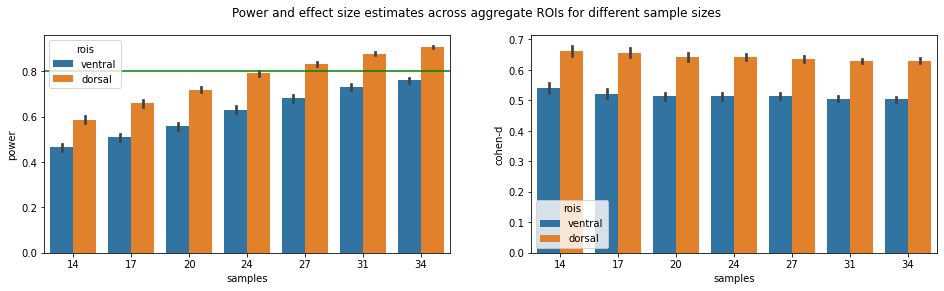

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.barplot(ax=ax[0], data=connectivity_tt_full, x='samples', y='power', hue='rois')
sns.barplot(ax=ax[1], data=connectivity_tt_full, x='samples', y='cohen-d', hue='rois')
fig.suptitle('Power and effect size estimates across aggregate ROIs for different sample sizes')
ax[0].axhline(0.8, color='g')
None

Effect Size: 0.529


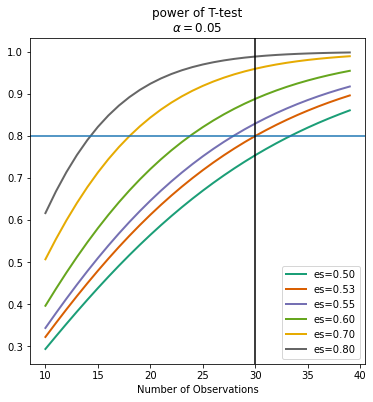

In [5]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1,1)
fig = TTestPower().plot_power(dep_var='nobs',
                              nobs = np.arange(10, 40),
                              effect_size = np.array([0.5, 0.529, 0.55, 0.6, 0.7, 0.8]),
                              alpha = 0.05,
                              ax=ax, title='power of T-test' + '\n' + r'$\alpha = 0.05$')
plt.axhline(0.8)
plt.axvline(30, color='k')

# getting example sample size for an expected effect size
effect = 0.6
power = 0.8
alpha = 0.05
power_analysis = TTestPower()
result = power_analysis.solve_power(power=power, nobs=30, alpha=alpha)
print('Effect Size: %.3f' % result)
None

## Summary of connectivity power analysis in adults.
The effect size found in Cooper et al., 2020 is strong and the authors only needed around 20 participants to see their actual effect of interest across two 'aggregated' ROIs i.e., 'ventral' and 'dorsal', which are a combination of the ROIs we will be using in our proposed analysis. Our sample will have 30 participants, even if our effect size is not as strong i.e., 0.529 we would still have enough power to see our desired effect in adults.


# Calculated power for developmental connectivity contrasts 

### Univariate contrast to measure developmental differences in boundary related connectivity
#### Measure: Univariate difference between groups at event boundaries across ROIs - Independent samples T-test

#### Riggins et al. 2016
Participants performed a memory task while in the scanner. They looked at 120 items.

In [24]:
conn_kids_HP_PAR = os.path.join(data_dir, 'riggins_2016/conn_ant-PC_child_riggins_etal_2016.csv')
df = pd.read_csv(conn_kids_HP_PAR, header=1)
df.columns = ['episodic', 'antHPC_PC']
df.head()
nsim = 1000
test_list = list()
for frac in [0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.9]: # different fractions of full sample (N=19)
    for sim in range(nsim):
        sdf = df.sample(frac=frac).copy()
        av = ttest(sdf.loc[:,'antHPC_PC'].values, 0)
        av['samples'] = sdf.shape[0]
        test_list.append(av)
connectivity_tt_full_dev = pd.concat(test_list)

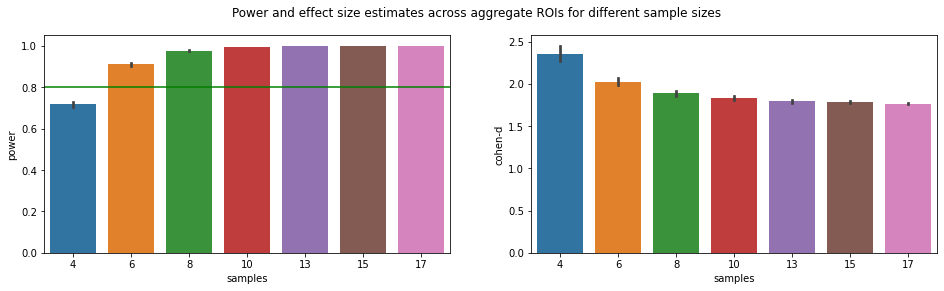

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))
sns.barplot(ax=ax[0], data=connectivity_tt_full_dev, x='samples', y='power')
sns.barplot(ax=ax[1], data=connectivity_tt_full_dev, x='samples', y='cohen-d')
fig.suptitle('Power and effect size estimates')
ax[0].axhline(0.8, color='g')
None